# AOS 51 Lab, Spring 2018, Lab #2
---

Lab #1 recap:
* Lists are cool, but limiting
* For loops allow us to iterate over time series
* If statements test for meeting conditions

Topics covered in Lab #2:

* Mathematical operations in Python
* Arrays vs. lists
* Math/stats on arrays using the Numerical Python (NumPy) package
* Correlations and linear regression using the Scientific Python (SciPy) package
---

# Mathematical Operations

The following mathematical operations are built into Python:

* `+` (addition)
* `-` (subtraction)
* `*` (multiplication)
* `/` (divison)
* `**` (exponent) 

In [2]:
rain1 = 1.3
rain2 = 2.8

print(rain1+rain2)

4.1


In [3]:
print(rain2-rain1)

1.4999999999999998


In [4]:
print(rain2*rain1)

3.6399999999999997


In [5]:
print(rain1/rain2)

0.46428571428571436


In [6]:
print(rain2**2)

7.839999999999999


In [7]:
print(rain2**(1/2)) # square root

1.6733200530681511


Simple enough, but we don't need a computer to perform math on 2 data points. The whole purpose of learing Python is to perform math/stats on big data sets, beyond what you could do with a calculator. 

---

# The problem with lists

Let's remind ourselves of what happens when we add two lists together:

In [8]:
list1 = [1.1, 0.4]
list2 = [0.4, 1.6]
print(list1 + list2)

[1.1, 0.4, 0.4, 1.6]


The two lists are concatenated (glued together), rather than adding each element between the lists and creating a new list of [1.5, 2].

What if want to just add a single value to all elements in`list1`?

In [9]:
print(list1 + 5.0)

TypeError: can only concatenate list (not "float") to list

Python does not allow this seemingly simple task! Why? You can only concatenate another list to an existing list.

What about simple subtraction of a value from a list?

In [10]:
print(list1 - 5.0)

TypeError: unsupported operand type(s) for -: 'list' and 'float'

Nope. Python does not allow the operand "-" between a list (`list1`) and a float (`-5.0`).

This is annoying. How can we perform simple arithmetic on a series of values?!

---

# Arrays

Lists are great for simple exercises like looping through a 1-D data set and storing certain elements of the data.

But for most climate analyses, we need to with *arrays*. Arrays are N-dimensional containers of data. Climate data is often 3D (time x latitude x longitude) or 4D (time x elevation x latitude x longitude).

We'll learn the basics of array-based programming using 1D arrays today, then advance to multi-dimensional datasets next week. 

---

# Numpy arrays 

Array-based programming is performed with a package called [Numerical Python package](http://www.numpy.org/), or `numpy`.

Numpy needs to be imported into the Notebook to access all of its tools. 

### Importing packages

There are 3 ways to import `numpy` (or any other Python package).

1. Import the entire package

    `import numpy`

2. Import the entire package and give it a short nickname

   `import numpy as np`

3. Import a specific module (e.g. the linear algebra (linalg) from the package

    `from numpy import linalg`

If you import a package correctly, you'll simply receive no error messages. Let's import `numpy` and give it the nickname `np`.

In [11]:
import numpy as np

Woo! No error messages. What happens if we accidentally misspell it?

In [12]:
import numpyy as np

ModuleNotFoundError: No module named 'numpyy'

Python can't find a 'numpyy' package/module, raising the `ModuleNotFoundError` message. 

You only need to import packages once, and all packages should be imported at the top of scripts/Notebooks. 

### Creating a Numpy array

Recall the following list from Lab #1:

In [13]:
temp_2017 = [42.1, 47.3, 53.4, 55.6, 63.4, 72.8, 78.8, 77.8, 69.8, 61.9, 53.4, 47.4]

Let's change it into an array using the [np.array()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html) function. 

The period between `np` and `array` means that we are accessing the `array` command from `numpy` (which we've renamed as `np`)

In [14]:
temp_2017_arr = np.array(temp_2017)

# Print the type() to confirm it is an array
print(type(temp_2017_arr))

<class 'numpy.ndarray'>


What do we see above for the `type()` of `temp_2017_arr`? A numpy N-Dimensional array or simply `numpy.ndarray`.

### Length of lists = shape of arrays

Similar to the `len()` function for lists, we can use the [np.shape()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) function to obtain information about the length of dimensions in arrays.

In [15]:
print(np.shape(temp_2017_arr))

(12,)


`np.shape()` returns a tuple (similar to a list, but uses parentheses instead of brackets) storing the length of each dimension in the array, separated by commas. 

Since `temp_2017_arr` is 1-dimensional, there are no other dimensions to report after the first one (with a length of 12), leading to the trailing comma. 

We'll work with multi-dimensional arrays soon!

### Arithmetic on arrays

Unlike lists, we can perform arithmetic on arrays.

In [16]:
print(temp_2017_arr + 5.0)

[ 47.1  52.3  58.4  60.6  68.4  77.8  83.8  82.8  74.8  66.9  58.4  52.4]


In [17]:
print(temp_2017_arr - 25.0)

[ 17.1  22.3  28.4  30.6  38.4  47.8  53.8  52.8  44.8  36.9  28.4  22.4]


In [18]:
print(temp_2017_arr * 0.25)

[ 10.525  11.825  13.35   13.9    15.85   18.2    19.7    19.45   17.45
  15.475  13.35   11.85 ]


In [19]:
print(temp_2017_arr / 2.)

[ 21.05  23.65  26.7   27.8   31.7   36.4   39.4   38.9   34.9   30.95
  26.7   23.7 ]


In [20]:
print(temp_2017_arr**2)

[ 1772.41  2237.29  2851.56  3091.36  4019.56  5299.84  6209.44  6052.84
  4872.04  3831.61  2851.56  2246.76]


Arithmetic over 2 arrays is performed element-wise: 

In [21]:
arr1 = np.array([10.0, 15.0, 20.0])
arr2 = np.array([2.0, 3.0, 10.0])
print(arr1 + arr2)

[ 12.  18.  30.]


In [22]:
print(arr1 - arr2)

[  8.  12.  10.]


In [23]:
print(arr1 / arr2)

[ 5.  5.  2.]


In [24]:
print(arr1 + (arr2**2))

[  14.   24.  120.]


What happens if you try to add two arrays of different shapes?

In [25]:
arr3 = np.array([7.0, 12.5, -3.5, -9.0])
print(arr2 + arr3)

ValueError: operands could not be broadcast together with shapes (3,) (4,) 

Python raises a `ValueError` and explains to us that it is impossible to add something with shape (3,) to shape (4,). 

### Summing arrays

Numpy also has functions to sum elements in arrays.

In [26]:
# Simple summation
daily_precip = np.array([0.01, 0.00, 0.25, 0.00, 1.3, 1.5, 0.00])
weekly_total = np.sum(daily_precip)
print(weekly_total)

3.06


In [28]:
# Cumulation summatation
cumulative_totals = np.cumsum(daily_precip)
print(cumulative_totals)

[ 0.01  0.01  0.26  0.26  1.56  3.06  3.06]


** In-class exercise **

2017 monthly total precipitation over Los Angeles:

| Month | PR (in) |
|---|---|
|Jan| 7.44|
|Feb| 4.05
|Mar| 0.08|
|Apr| 0.38|
|May| 0.13|
|Jun| 0.00|
|Jul| 0.00|
|Aug| 0.00|
|Sep| 0.08|
|Oct| 0.00|
|Nov| 0.10|
|Dec| 0.01|



1. Create an array called `la_precip_2017` storing these monthly precipitation amounts.
2. Double-check that this array has a single dimension of length 12. 
3. How much precipitation accumulated through May?
4. Slice `la_precip_2017` into two and form new arrays called `janjune_2017` and `julydec_2017`
5. Use a boolean statement to prove that January-June is wetter than July-Dec. 

### Statistics on arrays

The following statistics are also part of the `numpy` package that we'll frequently use in the lab:

* Average or mean: `np.mean()`
* Minimum: `np.min()`
* Maximum: `np.max()`
* Median: `np.median()`
* Standard deviation: `np.std()`

In [24]:
print(np.mean(temp_2017_arr))

60.3083333333


In [25]:
print(np.min(temp_2017_arr))

42.1


In [26]:
print(np.max(temp_2017_arr))

78.8


In [27]:
print(np.median(temp_2017_arr))

58.75


In [28]:
print(np.std(temp_2017_arr))

11.8712859689


In addition to locating the min/max values in arrays, we often care about the corresponding min/max indices.

For example:
>What month in 2017 had the highest temperature?

To answer this, we can use the [np.argmax()](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.argmax.html) or [np.argmin()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html) functions, which returns the *index* associated with the max/min value.

In [29]:
warmest_month = np.argmax(temp_2017_arr)
print(warmest_month)

6


So, index 6 (or month 7 - July) in `temp_2017_arr` has the maximum value. 

We can confirm quickly:

In [30]:
print(temp_2017_arr[warmest_month]) 
print(np.max(temp_2017_arr))

78.8
78.8


In [32]:
# Using Boolean relationships to double-check
print(temp_2017_arr[warmest_month] == np.max(temp_2017_arr))

True


** In-class exercise **

In [36]:
# Hourly windspeed (mph) at LAX from midnight-11pm on April 11, 2018
windspeed = [3.5, 3.5, 3.5, 3.5, 4.6, 4.6, 4.6, 4.6, 6.9, 4.6, 
             3.5, 11.5, 10.4, 9.2, 6.9, 15.0, 16.1, 20.7, 23.0, 
             21.9, 18.4, 18.4, 3.5, 12.7]


1. Create a new variable called `windspeed_arr` that changes the list `windspeed` to an array.
2. What is the mean, min, and max, median, and standard deviation of `windspeed_arr`?
3. Using `np.argmax()`, what was the windiest hour?

---

# Advanced statistics using Scipy

Scientific Python or [Scipy](https://www.scipy.org/) contains a vast set of advanced statistical tools for climate data analyses. 

Today, we'll focus on two common statistical procedures:

1. Correlation
2. Linear regression

Both can be performed using the `stats` toolbox in the `scipy` package. Let's import this package:

In [42]:
from scipy import stats

### Correlation

The [Pearson](https://en.wikipedia.org/wiki/Karl_Pearson) correlation coefficient measures the linear relationship between two datasets. 

The coefficient, abbreviated as "r", ranges between -1 and +1:

* r = 0 indicates no correlation
* r = +1 indicates total positive correlation 
* r = -1 indicates total negative correlation

Correlations are also associated with a p-value that tests for statistical significance of the correlation. The sample size of the datasets, and of course their potential relationships, influence the p_value. 

If the p-value is less than or equal to a desired significance level (usually 95% or 99%), then you can conclude that the correlation is very likely different from 0.

For example, is the p_value is < 0.05, then the correlation is said to be statistically significant at the 95% level. 

Let's demonstrate with an example using the [scipy.stats.pearsonr](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html) function:

In [43]:
# Los Angeles monthly minimum and maximum temperatures during 2017 (degrees F)
min_temp_2017 = np.array([48.8, 51.8, 52.8, 55.4, 57.1, 60.9, 65.8, 66.8, 64.6, 62.5, 57.3, 50.2])
max_temp_2017 = np.array([62.7, 62.6, 69.3, 71.9, 69.4, 72.6, 77.5, 77.3, 78.5, 80.4, 73.7, 72.4])

r_value, p_value = stats.pearsonr(min_temp_2017, max_temp_2017)
print(r_value, p_value)

0.834420478781 0.000737073922618


So, the correlation coefficient is 0.8, indicating a strong positive linear relationship between minimum and maximum temperatures over LA. 

Additionally, the p_value is 0.0007, which is much less than 0.01, or statistically significant at the 99% level.

Note how I assigned two variables - `r_value` and `p_value` - on one line in the correlation procedure. This is permitted on functions that return more than one output (as the `pearsonr` function does). 

We could have simply assigned one variable, for example `corr`, to contain all the information returned from the  `pearsonr` function and then unpacked the tuple (again, they're basically lists that use parentheses instead of brackets):

In [44]:
corr = stats.pearsonr(min_temp_2017, max_temp_2017)

# Two ways to unpack `corr`:
r_value = corr[0]
p_value = corr[1]

# Alternatively,
r_value, p_value = corr

print(r_value, p_value)

0.834420478781 0.000737073922618


If you accidentally try to assign more variables than returned outputs (or elements in a tuple/list), Python will simply raise an error telling you that:

In [45]:
r_value, p_value, z_value = stats.pearsonr(min_temp_2017, max_temp_2017)

ValueError: not enough values to unpack (expected 3, got 2)

Python expected to have 3 items to unpack into `r_value`, `p_value`, and `z_value`, but `pearsonr` only returns r- and p-values. 

### Linear regression

Another common statistical operation in climate science is [linear regression](https://en.wikipedia.org/wiki/Linear_regression).

Linear regression models the relationship between a dependent variable "y" and one (or more) independent variables denoted "x". 

Using linear regression, we can compute the slope of a best-fitted line between, for example, temperature observations (dependent variable) over some time period (independent variable). The slope is equivalent to the trend of temperature over time.  

Let's demonstrate with an important question:

>What is the trend of annual temperatures across California over the past 50 years (1968-2017)?

**(1)** Examine the time series (unit: degrees F) and do some sanity checks.

In [46]:
temp_1968_2017 = np.array([57.6, 57.5, 57.8, 56.2, 57.3, 57.3, 57.6, 56.3, 57.5, 58.0, 57.6, 57.7, 
                           58.1, 59.3, 56.3, 57.6, 58.2, 57.3, 58.9, 58.3, 58.7, 58.1, 58.0, 58.1, 
                           59.3, 57.7, 58.0, 58.9, 59.6, 59.1, 56.7, 58.0, 58.8, 59.1, 58.8, 59.4, 
                           58.9, 58.6, 58.6, 58.9, 58.9, 58.8, 57.7, 57.4, 59.5, 59.3, 61.4, 60.8, 
                           60.1, 60.3])

Confirming the time series is 50 years long:

In [47]:
print(np.shape(temp_1968_2017))

(50,)


Visually inspect the data to give yourself a ballpark idea of what to expect before executing the code.

In the late 1960's, California temperatures were ~57 degrees F. By 2015-2017, temperatures increased to ~60 degrees F, or roughly a 3 degree increase over 50 years. Let's keep that estimate in mind to serve as a sanity check on the code output.

** (2) ** Gather our y (dependent) and x (independent) variables

We already have our y variable, `temp_1968_2017`. 

We still need our x variable, in this case, an array of years spanning 1968-2017. 

We could create a new array and type in every year using:

`years = np.array([1968, 1969, 1970, ..., 2017])`

That's tedious! Luckily, [np.arange()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) is a numpy function that creates an array storing a range of numbers.  

In [48]:
years = np.arange(1968,2017)
print(years)

[1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982
 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016]


Why does this array end with 2016 when we entered 2017 as the final value?

Like slicing, **Python counts up to but does not include the final value in a range!**

Thus, we need to modify `years` to have an end value of 2018, so it includes 2017.

In [49]:
years = np.arange(1968,2018)
print(years)

[1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982
 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017]


Note: many Python programmers create ranges with a "+1" tacked onto the final value instead of using a final value with one added to it:

`years = np.arange(1968,2017+1)`

** (3) ** Use the [scipy.stats.linregress](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html) funtion to compute the trend.

This function uses a [least-squares approach](https://en.wikipedia.org/wiki/Ordinary_least_squares) to compute the regression line.

The general syntax of the `lineregress` function is:

`slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)`

This says "return the slope, interecept, r_value, p_value, and std_err by performing a linear regression of the variables x and y."

* slope = slope (or trend) of the regression line

* intercept = intercept of the regression line

* r-value = correlation coefficient

* p-value = two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero

* stderr = standard error of the estimate

Let's enter our `x` (`years`) and `y` (`temp_1968_2017`) arrays and compute the slope of the regression line.

In [50]:
slope, intercept, r_value, p_value, std_err = stats.linregress(years, temp_1968_2017)
print(slope)

0.0514621848739


The slope is approximately 0.05 degrees F per year, or 0.5 degrees F per decade, or 2.5 degrees F per 50 years (close to our estimate!)

Optional further reading:

[Super nerdy comparison of the many ways to perform linear regressions using Python](https://medium.freecodecamp.org/data-science-with-python-8-ways-to-do-linear-regression-and-measure-their-speed-b5577d75f8b)

[NOAA summary of global temperature trends](https://www.climate.gov/news-features/understanding-climate/climate-change-global-temperature)

** In-class exercise **

Let's explore how annual *maximum* temperature over California has changed over the past 50 years. 

In [51]:
tmax_1968_2017 = np.array([ 70.0,  69.7,  70.3,  68.6,  69.6,  69.4,  
        70.2,  68.7,  70.5, 70.6,  69.6,  70.1,  70.5,  71.6,  67.9,  
        68.6,  70.4,  69.9, 71.2,  70.8,  71.7,  71.1,  70.9,  70.8,  
        71.5,  69.8,  70.6, 71.0,  71.9,  71.5,  68.2,  70.8,  71.2,  
        71.7,  72. ,  71.8, 71.4,  70.8,  71.3,  72. ,  71.9,  71.7,  
        69.8,  70. ,  72.5, 72.6,  74.2,  73.4,  72.5,  72.7])

1. What is the difference in Tmax between the 1968-1972 average and the 2013-2017 average (i.e. the first 5 years and last 5 years of the time series)?
2. What is the trend of Tmax over this time period? How does it compare to Tavg? 

---

** A taste of what's to come **

In a few weeks, we'll learn to plot data. 

No need to understand the code below yet, this is just meant to visualize the temperature time series and trendline, and hopefully get you amped on what's to come.

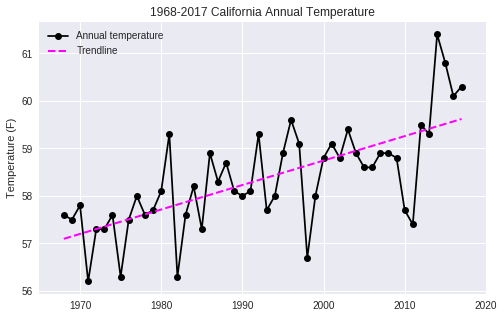

In [57]:
import seaborn
import matplotlib.pyplot as plt

regression_line = slope*years + intercept

fig = plt.figure(figsize=(8,5))

ax = fig.add_subplot(1,1,1)
ax.plot(years, temp_1968_2017, color='black', linestyle='solid', marker='o', label='Annual temperature')
ax.plot(years, regression_line, color='magenta', linestyle='dashed', linewidth=2, label='Trendline')
ax.set_ylabel('Temperature (F)')
ax.set_xlim(1965, 2020)
ax.set_title('1968-2017 California Annual Temperature')

plt.legend(loc='upper left', frameon=False)
plt.show()

---
Optional further reading:

[The identification of distinct patterns in California temperature trends](The identification of distinct patterns in California temperature trends) 